In [121]:
# Analiza i modyfikacja danych
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ewaluacja
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

models = [DecisionTreeClassifier(class_weight='balanced'), RandomForestClassifier(), KNeighborsClassifier(), MLPClassifier(random_state=1, max_iter=300), svm.SVC(kernel='linear')]
models_names = ['Tree', 'Forest', 'KNN', 'MLP', 'SVM']

def read_data():
    df = pd.read_csv('data/result_hourly.csv')
    print(df.head())
    return df;


def calculate_feeling_rate_distribution(df):
    print('DATA:')
    count = df.count()[0]
    data = []
    numbers = df['rate'].unique()
    for i in numbers:
        occur = df['rate'].value_counts()[i]
        percent = (occur / count) * 100
        value = round(percent, 2)
        data.append(value)
        print(str(i) + ' ' + str(round(percent, 2)) + '%')
        
    fig, ax = plt.subplots()
    ax.pie(data, labels=numbers, autopct='%1.1f%%')
    ax.set_title('Rozkład klas samopoczucia')

def print_df_information(df):
    print(df.head())
    print(df.info())
    print(df.describe())

def clean_up(df):
    df =  df.drop(columns=df.columns[[5, 6, 8]], axis=1)
    return df

def normalize(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

def standarize(x):
    scaler = StandardScaler()
    return scaler.fit_transform(x)


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def print_plot(metric, method_name, y):
    plt.bar(models_names, metric)
    addlabels(models_names, metric)

    #giving title to the plot
    plt.title(method_name)
    
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel(y)
    plt.show

def test_models(X_train, Y_train):  
    for model in models:
        print(str(model))
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        #Balanced acuurancy
        balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
        balanced.append(round(balanced_accurancy, 2))

        #Clasification report
        report = classification_report(Y_test, Y_pred, output_dict=True)
        print(classification_report(Y_test, Y_pred))

        accur = report['accuracy']
        accuracy.append(round(accur, 2))
    
        prec =  report['macro avg']['precision'] 
        precision.append(round(prec, 2))
        
        rec = report['macro avg']['recall'] 
        recall.append(round(rec, 2))
    
        #F1
        macro_f1 = report['macro avg']['f1-score']
        f1.append(round(macro_f1, 2))

        #Confiusion Matrix
        cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
        disp.plot()

def test_models_cross_validation(model_name, model, X_train, Y_train):
    scoring_metrics = ['accuracy', 'f1_micro','f1_macro', 'f1_weighted', 'recall_macro', 'precision_macro']
    scores_dict = {"accuracy":[], "f1_micro":[], 'f1_macro':[], 'f1_weighted':[], 'recall_macro':[], 'precision_macro':[]};
    results = []
    for metric in scoring_metrics:
        scores = cross_val_score(model, X_train, Y_train, cv=25, scoring=metric)
        scores_dict[metric].append(scores)
    return scores_dict

def test_models_cv_hiper(model_name, model, X_train, Y_train):
    scoring_metrics = ['accuracy', 'f1_micro','f1_macro', 'f1_weighted', 'recall_macro', 'precision_macro']
    scores_dict = {"accuracy":[], "f1_micro":[], 'f1_macro':[], 'f1_weighted':[], 'recall_macro':[], 'precision_macro':[]};
    results = []
    for metric in scoring_metrics:
        scores = cross_val_score(model, X_train, Y_train, cv=5, scoring=metric)
        scores_dict[metric].append(scores) 
    return scores_dict

#CROSS VAL FIGURE
def get_figure_for_metric(metric, res, ytitle, title):
# Plotting
    iterations = np.arange(1,  26)
    plt.figure(figsize=(10, 6))
    for model in models:
        index = models.index(model)
        plt.plot(np.array(iterations), np.array(res[index][metric]).flatten(), marker='o', linestyle='-', label=models_names[index])
    
    plt.title(title)
    plt.xlabel('Iteracja')
    plt.ylabel(ytitle)
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_cross_val_results(res, X_train, Y_train):
    for model in models:
        index = models.index(model)
        result = test_models_cross_validation(models_names[index], model, X_train, Y_train)
        res.append(result)


def get_figure_for_metric(metric, res, ytitle, title):
# Plotting
    iterations = np.arange(1,  26)
    plt.figure(figsize=(10, 6))
    
    for model in models:
        index = models.index(model)
        plt.plot(np.array(iterations), np.array(res[index][metric]).flatten(), marker='o', linestyle='-', label=models_names[index])
        print(models_names[index])
        print(np.array(res[index][metric]).mean())
    
    plt.title(title)
    plt.xlabel('Iteracja')
    plt.ylabel(ytitle)
    plt.legend()
    plt.grid(True)


def get_stats(res):
    metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'f1_micro', 'f1_weighted']
    for metric in metrics:
        print(metric)
        for model in models:
            index = models.index(model)
            print(str(np.array(res[index][metric]).mean()))
            

In [122]:
df = read_data()


   steps  heart_rate_avg  max_heart  min_heart  raw_intensity_avg  hour  rate
0    133           80.00         80         80            35.5667     7     2
1   1316           80.00         80         80            59.5333     8     2
2   1058           81.48        102         64            43.7833     9     2
3    434           75.93         95         61            35.5167    10     2
4    532           76.02        100         61            37.0667    11     2


DATA:
2 9.59%
0 78.48%
1 11.93%


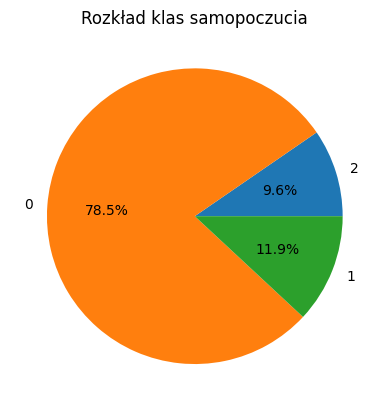

In [123]:
calculate_feeling_rate_distribution(df)

In [124]:
df = df[df['rate'] != 2]

DATA:
0 86.8%
1 13.2%


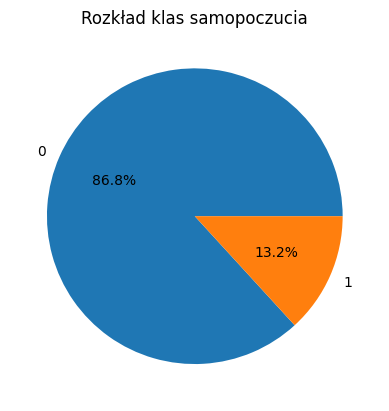

In [125]:
calculate_feeling_rate_distribution(df)

In [126]:
#df = clean_up(df)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3857 entries, 5 to 4264
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   steps              3857 non-null   int64  
 1   heart_rate_avg     3857 non-null   float64
 2   max_heart          3857 non-null   int64  
 3   min_heart          3857 non-null   int64  
 4   raw_intensity_avg  3857 non-null   float64
 5   hour               3857 non-null   int64  
 6   rate               3857 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 241.1 KB


,steps,heart_rate_avg,max_heart,min_heart,raw_intensity_avg,hour,rate
count,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000
mean,567.840290,83.863116,99.557428,71.761473,40.614049,14.644802,0.131968
std,811.512868,10.540442,14.462442,9.667160,18.210060,3.861697,0.338500
min,0.000000,59.270000,66.000000,46.000000,0.883333,7.000000,0.000000
25%,54.000000,76.120000,88.000000,65.000000,26.866700,12.000000,0.000000
50%,183.000000,82.520000,100.000000,70.000000,37.864400,15.000000,0.000000
75%,807.000000,90.680000,111.000000,77.000000,51.133300,18.000000,0.000000
max,6141.000000,147.230000,172.000000,137.000000,117.875000,21.000000,1.000000


array([[<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'heart_rate_avg'}>,
        <Axes: title={'center': 'max_heart'}>],
       [<Axes: title={'center': 'min_heart'}>,
        <Axes: title={'center': 'raw_intensity_avg'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

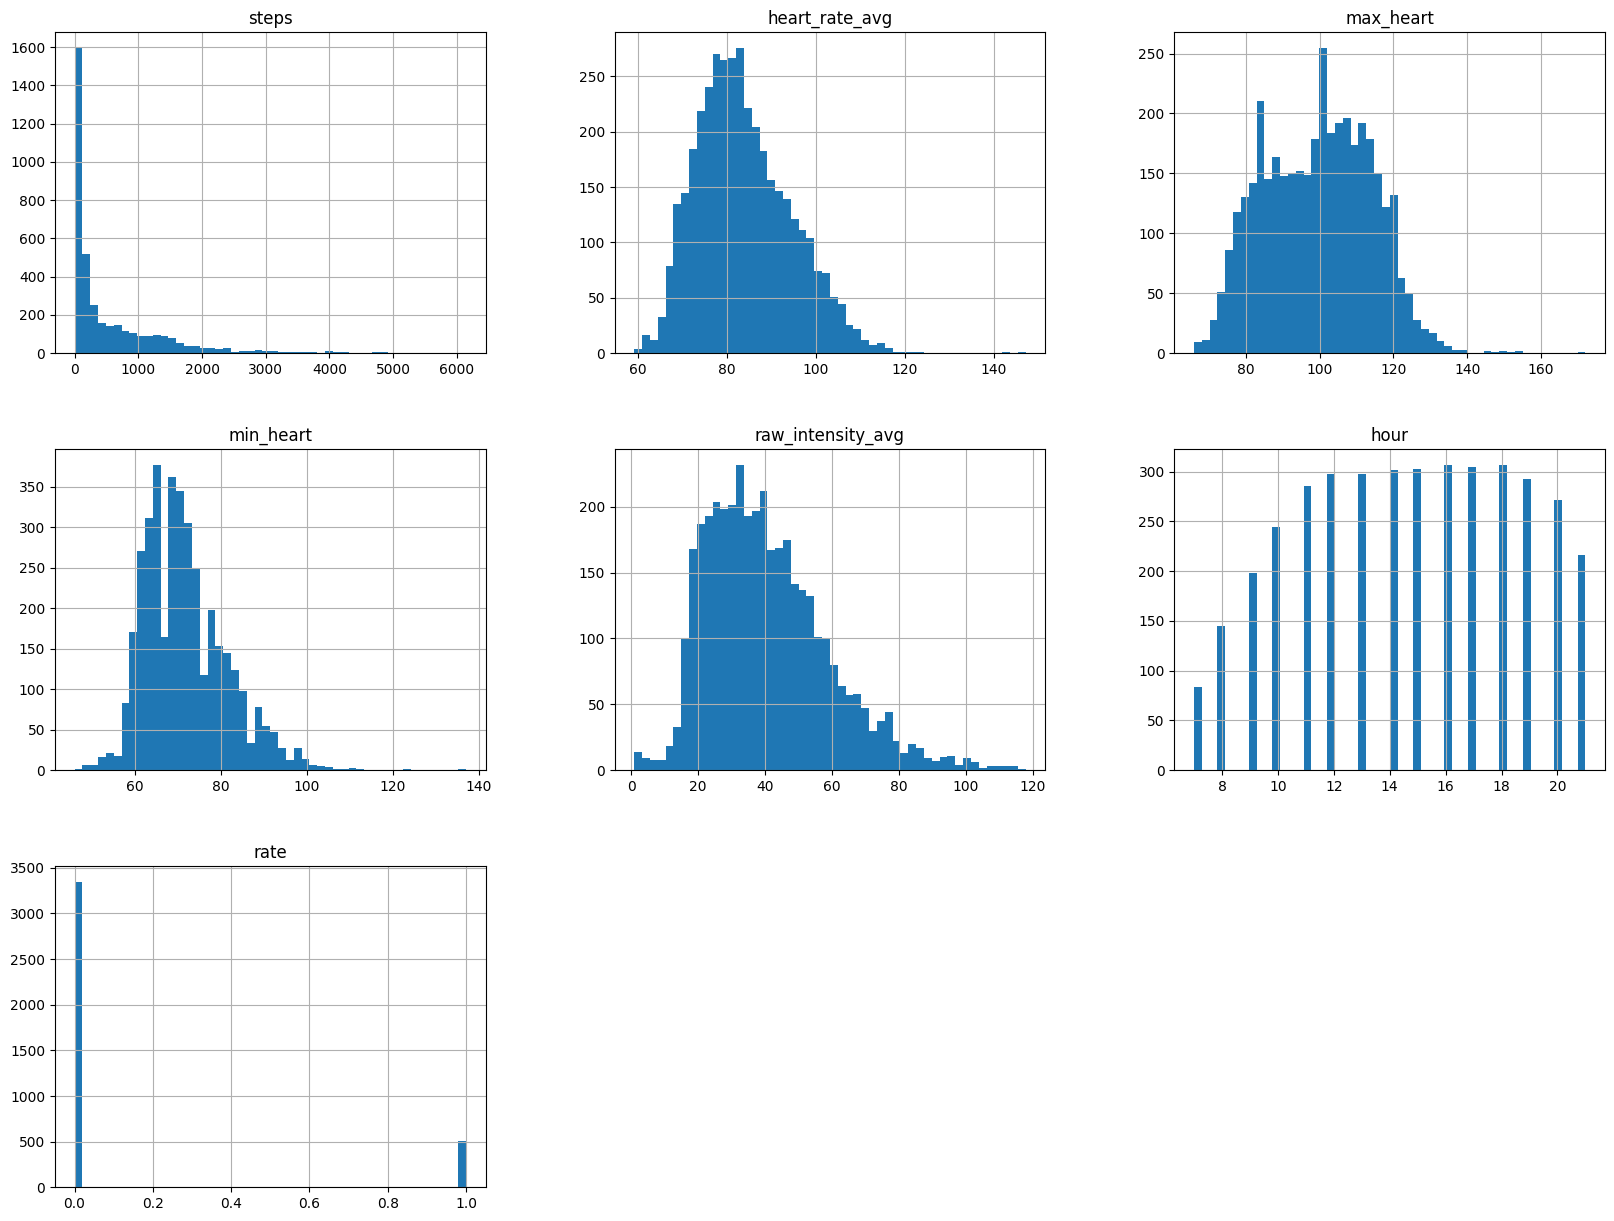

In [127]:
df.hist(bins=50, figsize=(20,15))

In [128]:
Y = df['rate'].values
x = df.drop(['rate'], axis=1).values
X = normalize(x)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71830, stratify=Y)

#X_train = normalize(X_train)
#X_test = normalize(X_test)

X_train = standarize(X_train)
X_test = standarize(X_test)



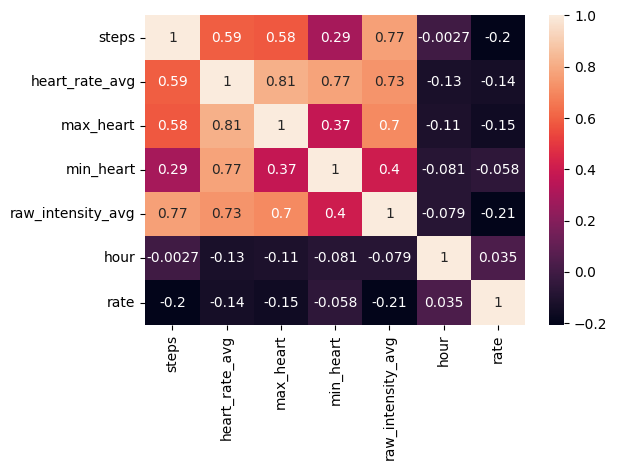

In [129]:
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()


In [130]:
res = []
calculate_cross_val_results(res, X_train, Y_train)


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reach

accuracy
0.8133307107264619
0.8739365329137162
0.8573983739837397
0.866464725937582
0.8680802517702595
precision_macro
0.5991099800290467
0.7437085487914161
0.6037506647437191
0.4339285270518115
0.43404012588512975
recall_macro
0.5962040345733309
0.587039633091035
0.5252986989188199
0.4990654205607477
0.5
f1_macro
0.5957061923946718
0.6130806487222901
0.5189908396642348
0.4642201812232228
0.46468947344509565
f1_micro
0.8123577235772356
0.87328350380278
0.8573983739837397
0.866464725937582
0.8680802517702595
f1_weighted
0.8124827743008032
0.8454338831425707
0.815882649842523
0.805970338450004
0.8067815566503279


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetric

In [ ]:
get_stats(res)

Tree
0.8133307107264619
Forest
0.8739365329137162
KNN
0.8573983739837397
MLP
0.866464725937582
SVM
0.8680802517702595


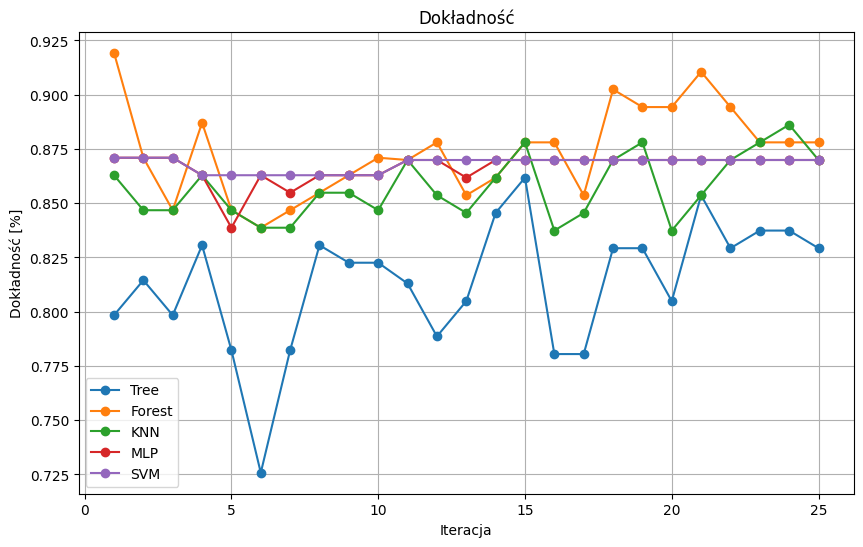

In [131]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.5957061923946718
Forest
0.6130806487222901
KNN
0.5189908396642348
MLP
0.4642201812232228
SVM
0.46468947344509565


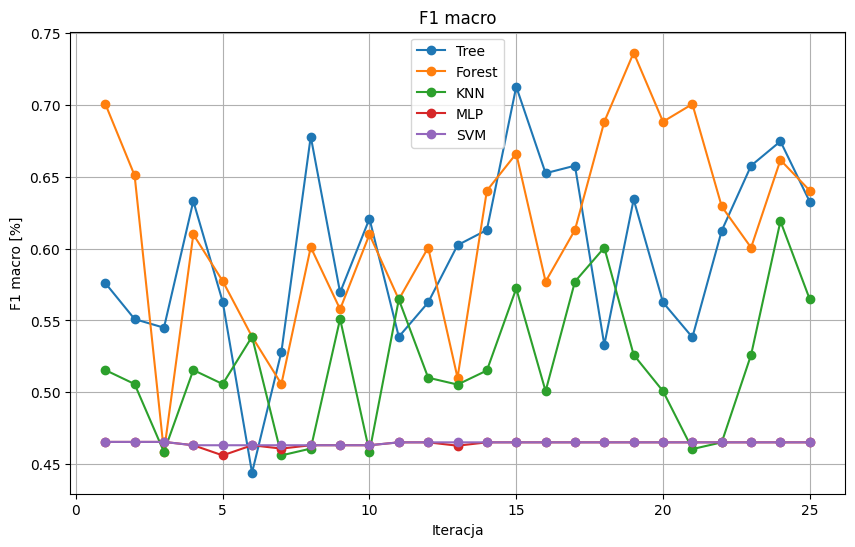

In [132]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

In [133]:
#ADASYN
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = ADASYN(sampling_strategy='auto').fit_resample(X_train, Y_train)


In [134]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.7892566990954089
0.8765574330090459
0.8138044034818229
0.727226489161973
0.6589477726574501
precision_macro
0.7891803371472919
0.8781249515069312
0.8402478102318345
0.7337593554581211
0.7109197711059724
recall_macro
0.7864579719282628
0.8760491637920259
0.8126053585094998
0.726608109157539
0.6567838073784228
f1_macro
0.7852409295912258
0.8749147347119103
0.8097254862267584
0.7251268374259646
0.6359937946450007
f1_micro
0.7888820617852876
0.8778597030209933
0.8138044034818229
0.727226489161973
0.6589477726574501
f1_weighted
0.7872737078308147
0.8734854992027947
0.8099690855292014
0.7253077421668104
0.6367968628211197


   rate
0     0
1     0
2     0
3     0
4     0
DATA:
0 49.56%
1 50.44%


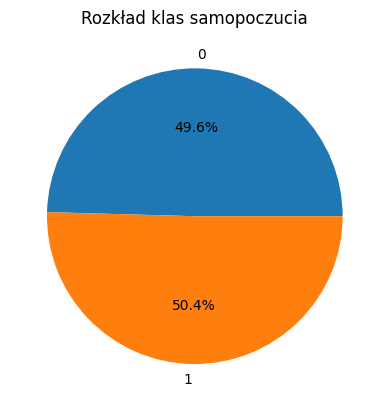

In [135]:
df_resampled = pd.DataFrame(Y_resampled, columns=['rate'])
print(df_resampled.head())
calculate_feeling_rate_distribution(df_resampled)

Tree
0.7892566990954089
Forest
0.8765574330090459
KNN
0.8138044034818229
MLP
0.727226489161973
SVM
0.6589477726574501


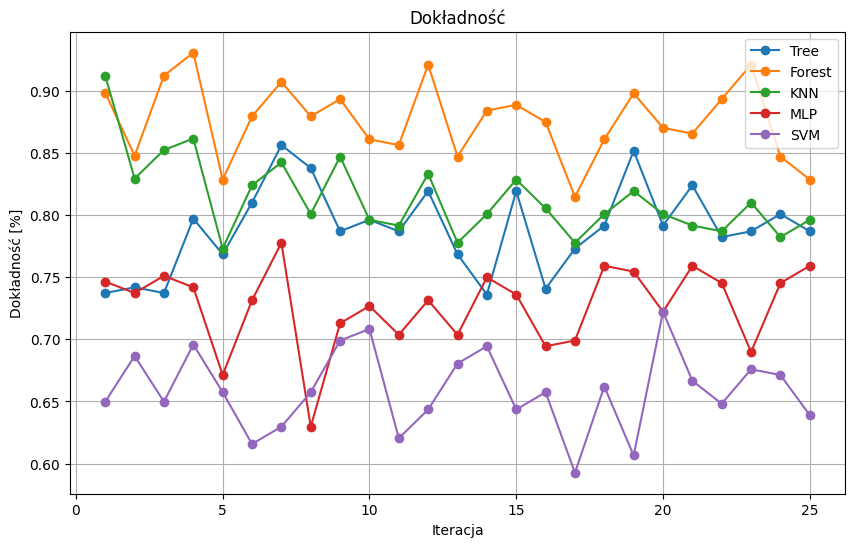

In [136]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.7852409295912258
Forest
0.8749147347119103
KNN
0.8097254862267584
MLP
0.7251268374259646
SVM
0.6359937946450007


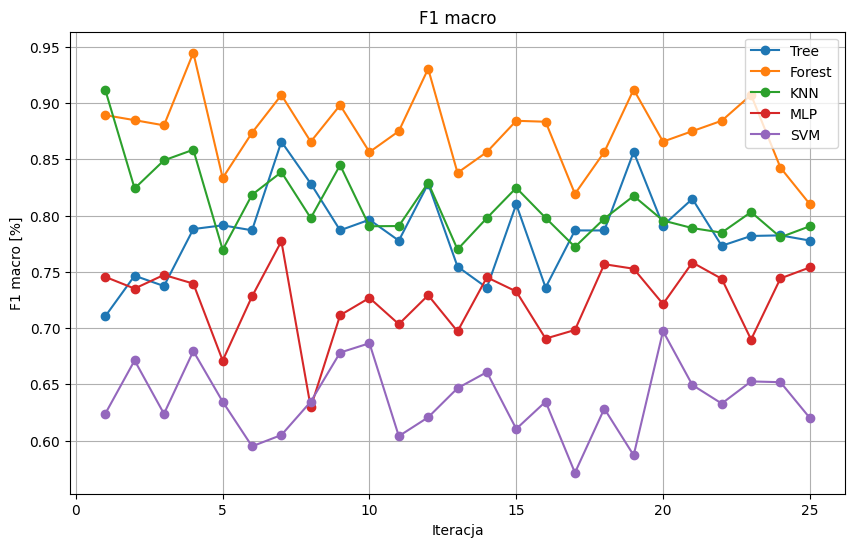

In [137]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

   rate
0     0
1     0
2     0
3     0
4     0
DATA:
0 50.0%
1 50.0%


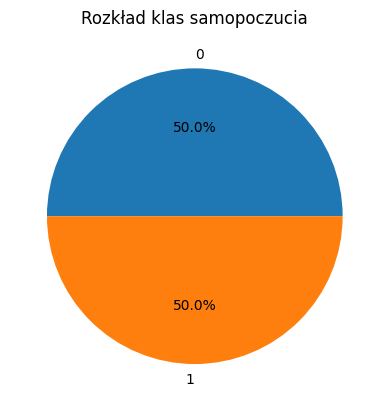

In [138]:
#SMOTE
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

df_resampled = pd.DataFrame(Y_resampled, columns=['rate'])
print(df_resampled.head())
calculate_feeling_rate_distribution(df_resampled)

In [139]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.8222916757226689
0.9020047815692241
0.8446502934144752
0.763272332101717
0.6661699630515107
precision_macro
0.8262044481251994
0.9053272066146266
0.8753117690560775
0.7706586720163419
0.7166377012367833
recall_macro
0.823753894080997
0.8989892696434753
0.8446365524402907
0.7632519903080651
0.6661751471097266
f1_macro
0.8200517688588566
0.9044132255860085
0.8412035535343736
0.7616685159508281
0.6454360851302628
f1_micro
0.8226672462508149
0.900884155618344
0.8446502934144752
0.763272332101717
0.6661699630515107
f1_weighted
0.8195142003134763
0.9006706811103284
0.8412076990514664
0.7616743063125553
0.6454350126094329


Tree
0.8222916757226689
Forest
0.9020047815692241
KNN
0.8446502934144752
MLP
0.763272332101717
SVM
0.6661699630515107


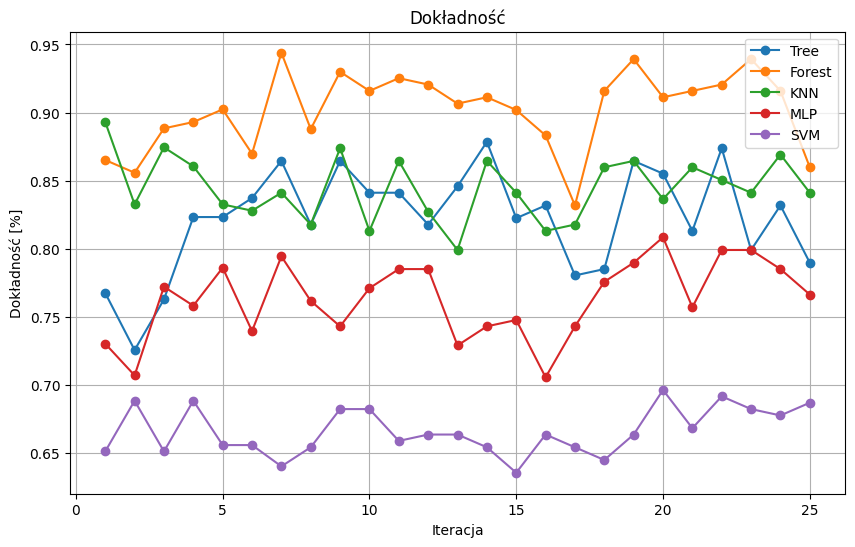

In [140]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.8200517688588566
Forest
0.9044132255860085
KNN
0.8412035535343736
MLP
0.7616685159508281
SVM
0.6454360851302628


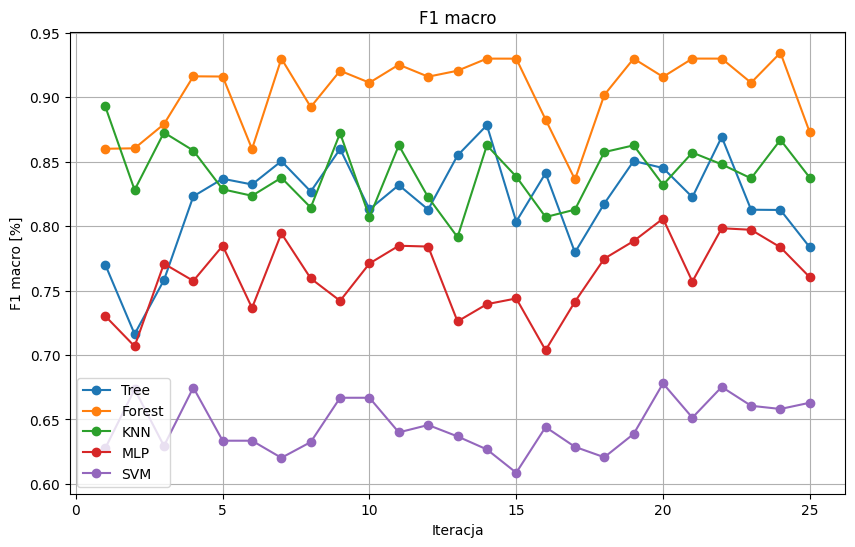

In [141]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

In [142]:
#Random Over Sampler
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)



   rate
0     0
1     0
2     0
3     0
4     0
DATA:
0 50.0%
1 50.0%


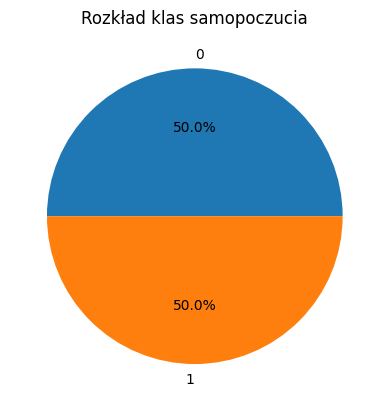

In [143]:
df_resampled = pd.DataFrame(Y_resampled, columns=['rate'])
print(df_resampled.head())
calculate_feeling_rate_distribution(df_resampled)

In [144]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.9462264725059771
0.9753610084764182
0.8496996305151053
0.7516800695500977
0.6609371875679202
precision_macro
0.9512858993864535
0.977684776476869
0.8752299828784439
0.756548916237472
0.7096824007662605
recall_macro
0.9465905157493943
0.9749826929733472
0.8496850121149185
0.7516701280719971
0.660944963655244
f1_macro
0.9445071183177453
0.976647494100159
0.8469445662119313
0.7504666164169538
0.6399051395762008
f1_micro
0.9445433601391002
0.9764764181699631
0.8496996305151053
0.7516800695500977
0.6609371875679202
f1_weighted
0.9464062245606786
0.977018635001668
0.8469478563693599
0.7504712080159718
0.6399031393783363


Tree
0.9462264725059771
Forest
0.9753610084764182
KNN
0.8496996305151053
MLP
0.7516800695500977
SVM
0.6609371875679202


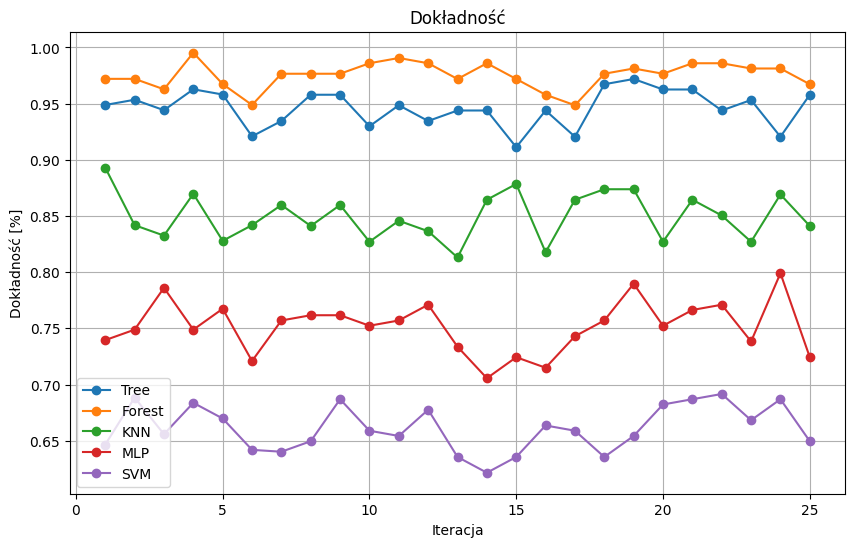

In [145]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.9445071183177453
Forest
0.976647494100159
KNN
0.8469445662119313
MLP
0.7504666164169538
SVM
0.6399051395762008


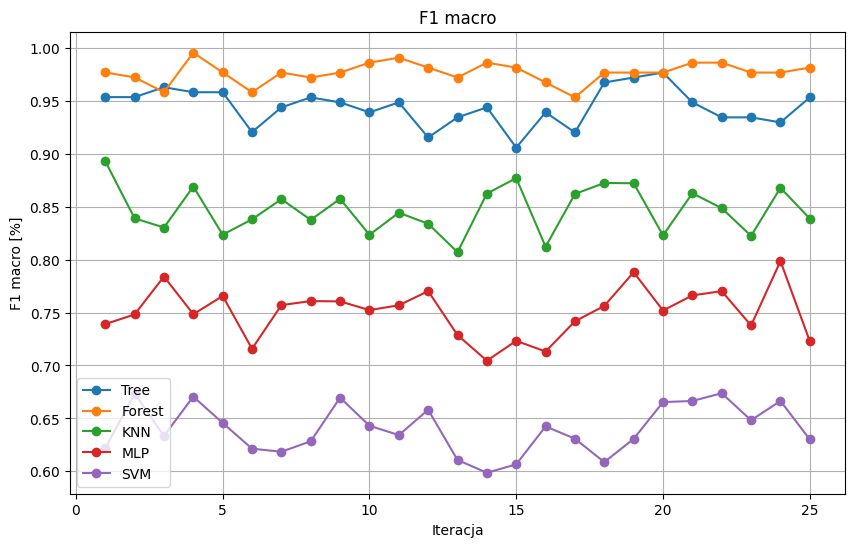

In [146]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

In [147]:
#SMOTE HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

# Define the hyperparameter grid for each classifier
param_grid_decision_tree = {'class_weight':['balanced', None], 
                            'max_depth': [None, 10, 20, 30, 40, 50, 100], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4], 
                            'criterion' :['gini', 'entropy', 'log_loss']}
param_grid_random_forest = {'class_weight':['balanced', 'balanced_subsample', None], 
                            'n_estimators': [5, 10, 100, 200], 
                            'max_depth': [None, 10, 30], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4],
                            'criterion' : ['gini', 'entropy', 'log_loss']}
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 
                  'activation': ['relu', 'tanh', 'logistic'], 
                  'max_iter': [200, 300, 400]}
param_grid_svm = {'C': [0.1, 1, 10, 20], 
                  'kernel': ['linear', 'rbf'], 
                  'gamma': ['scale', 'auto']}
# Create classifiers with balanced class weights
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
svm_classifier = svm.SVC()

In [148]:
# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_decision_tree.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)

Best hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [149]:
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_random_forest.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Random Forest:", grid_search_random_forest.best_params_)

Best hyperparameters for Random Forest: {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [150]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_resampled, Y_resampled)
print("Best hyperparameters for K-Nearest Neighbours:", grid_search_knn.best_params_)

Best hyperparameters for K-Nearest Neighbours: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [151]:
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_mlp.fit(X_resampled, Y_resampled)
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

Best hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 400}


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [152]:
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_resampled, Y_resampled)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

Best hyperparameters for SVM: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


In [155]:
#SMOTE HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)


#Found in previous Grid search 
models = [DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50, min_samples_leaf=1, min_samples_split=2), 
          RandomForestClassifier(class_weight='balanced', criterion= 'log_loss', max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=100), 
          KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto'), 
          MLPClassifier(max_iter=400, activation= 'relu', hidden_layer_sizes=(50,50)),
          svm.SVC(C=20, gamma='scale', kernel= 'rbf')]

res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.8221360573788309
0.9021934362095198
0.8704186046511628
0.8287989567485329
0.7645781351880027
precision_macro
0.8266714068282339
0.9059487846199289
0.8928037023607888
0.8273561643844444
0.7869963227745255
recall_macro
0.8237763932156456
0.9014053305642092
0.8704119072343371
0.8246832814122533
0.7645638629283488
f1_macro
0.8235321651853539
0.903499485385766
0.8683806419963643
0.8285921415834246
0.7599436914584521
f1_micro
0.8224977178874159
0.902009128450337
0.8704186046511628
0.8258222125624864
0.7645781351880026
f1_weighted
0.820478882827139
0.9016039842961078
0.8683824362414286
0.8234283302764919
0.759948689688696


DecisionTreeClassifier(criterion='entropy', max_depth=50)
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       670
           1       0.33      0.40      0.36       102

    accuracy                           0.81       772
   macro avg       0.62      0.64      0.63       772
weighted avg       0.83      0.81      0.82       772

RandomForestClassifier(class_weight='balanced', criterion='log_loss')
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       670
           1       0.47      0.28      0.35       102

    accuracy                           0.86       772
   macro avg       0.68      0.62      0.64       772
weighted avg       0.84      0.86      0.85       772

KNeighborsClassifier(n_neighbors=3, weights='distance')
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       670
           1       0.20      0.10      0.13       102

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       670
           1       0.34      0.22      0.27       102

    accuracy                           0.84       772
   macro avg       0.62      0.58      0.59       772
weighted avg       0.82      0.84      0.83       772

SVC(C=20)


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       670
           1       0.00      0.00      0.00       102

    accuracy                           0.87       772
   macro avg       0.43      0.50      0.46       772
weighted avg       0.75      0.87      0.81       772



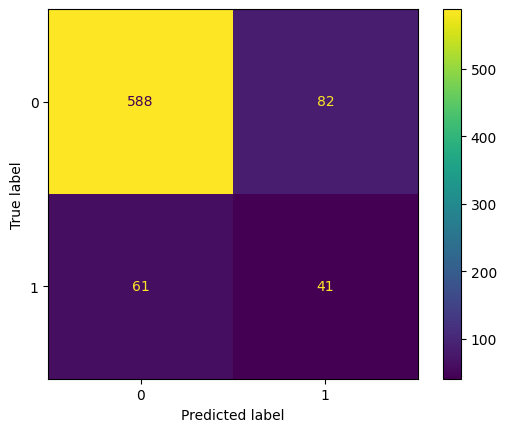

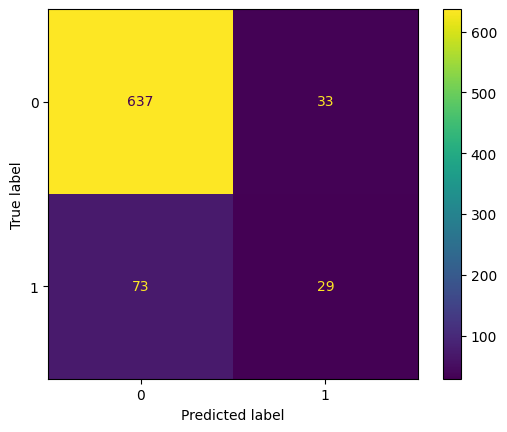

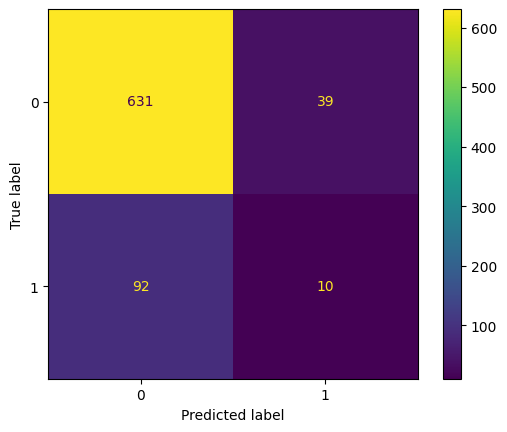

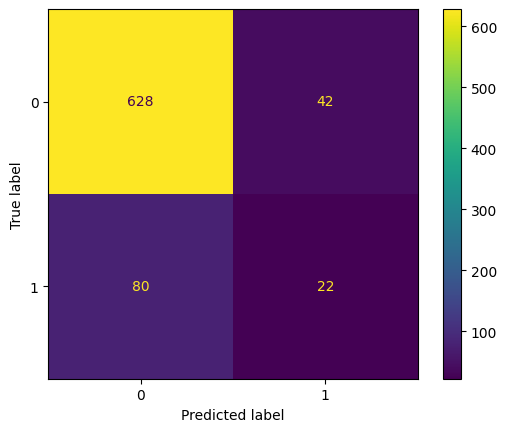

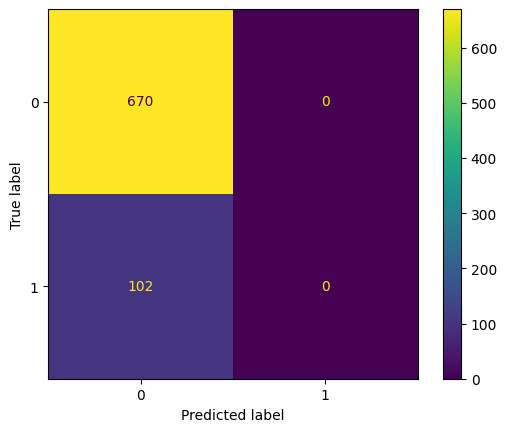

In [156]:
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

test_models(X_train, Y_train)     

In [157]:
#ROS HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled =  RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

# Define the hyperparameter grid for each classifier
param_grid_decision_tree = {'class_weight':['balanced', None], 
                            'max_depth': [None, 10, 20, 30, 40, 50, 100], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4], 
                            'criterion' :['gini', 'entropy', 'log_loss']}
param_grid_random_forest = {'class_weight':['balanced', 'balanced_subsample', None], 
                            'n_estimators': [5, 10, 100, 200], 
                            'max_depth': [None, 10, 30], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4],
                            'criterion' : ['gini', 'entropy', 'log_loss']}
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 
                  'activation': ['relu', 'tanh', 'logistic'], 
                  'max_iter': [200, 300, 400]}
param_grid_svm = {'C': [0.1, 1, 10, 20], 
                  'kernel': ['linear', 'rbf'], 
                  'gamma': ['scale', 'auto']}

# Create classifiers with balanced class weights
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
svm_classifier = svm.SVC()

# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')

In [158]:
# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_decision_tree.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)

Best hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [159]:
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_random_forest.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Random Forest:", grid_search_random_forest.best_params_)

Best hyperparameters for Random Forest: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [160]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_resampled, Y_resampled)
print("Best hyperparameters for K-Nearest Neighbours:", grid_search_knn.best_params_)

Best hyperparameters for K-Nearest Neighbours: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [161]:
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_mlp.fit(X_resampled, Y_resampled)
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

Best hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 400}


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [164]:
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_resampled, Y_resampled)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

Best hyperparameters for SVM: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


In [165]:
#ROS HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

X_resampled, Y_resampled =  RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

#Found in previous Grid search 
models = [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40, min_samples_leaf=1, min_samples_split=2), 
          RandomForestClassifier(class_weight='balanced_subsample', criterion='gini', max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
          KNeighborsClassifier(algorithm='auto',n_neighbors=3, weights='distance'), 
          MLPClassifier(max_iter=400, activation= 'relu', hidden_layer_sizes=(50,50)),
          svm.SVC(C=20, gamma='scale', kernel= 'rbf')]


In [166]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.9462195174961964
0.9757313627472288
0.8984290371658336
0.838131710497718
0.7496283416648554
precision_macro
0.9520064207013096
0.9773033750751202
0.9158930225999197
0.8514463904433924
0.7670422059478952
recall_macro
0.9456628591208032
0.9740446521287643
0.8984285219799238
0.8409034267912772
0.7496209761163031
f1_macro
0.9471655319595027
0.975521333361884
0.8972690905189631
0.8392126910424034
0.7454082310341152
f1_micro
0.9480904151271464
0.9757278852423387
0.8984290371658336
0.8450406433384046
0.7496283416648554
f1_weighted
0.9448933994003902
0.9766452005816104
0.8972690019347505
0.8425821829939214
0.7454129744222955


DecisionTreeClassifier(max_depth=40)
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       670
           1       0.26      0.33      0.29       102

    accuracy                           0.78       772
   macro avg       0.58      0.59      0.58       772
weighted avg       0.81      0.78      0.80       772

RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       n_estimators=200)
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       670
           1       0.49      0.28      0.36       102

    accuracy                           0.87       772
   macro avg       0.69      0.62      0.64       772
weighted avg       0.84      0.87      0.85       772

KNeighborsClassifier(n_neighbors=3, weights='distance')
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       670
           1       0.20      0.

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       670
           1       0.00      0.00      0.00       102

    accuracy                           0.87       772
   macro avg       0.43      0.50      0.46       772
weighted avg       0.75      0.87      0.81       772



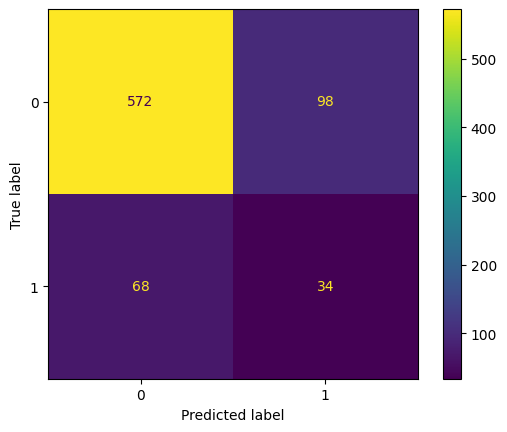

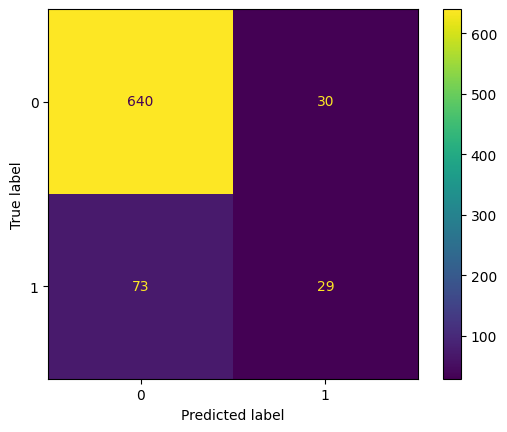

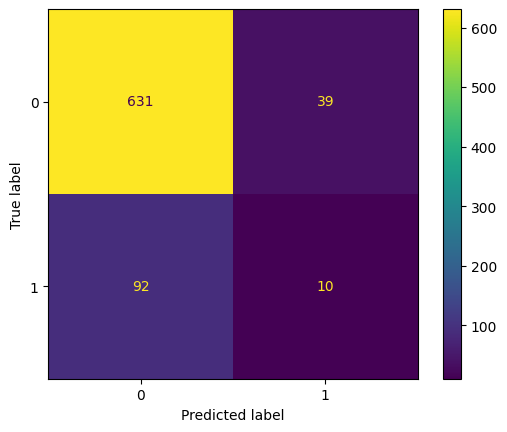

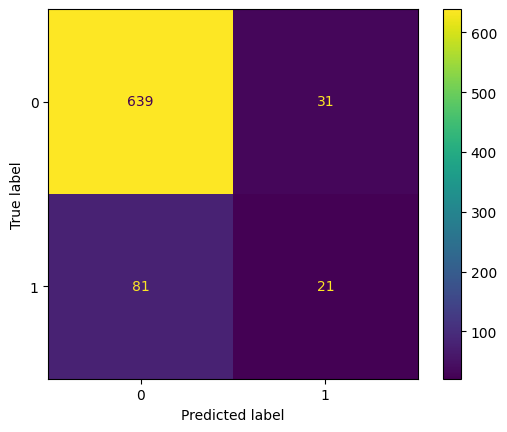

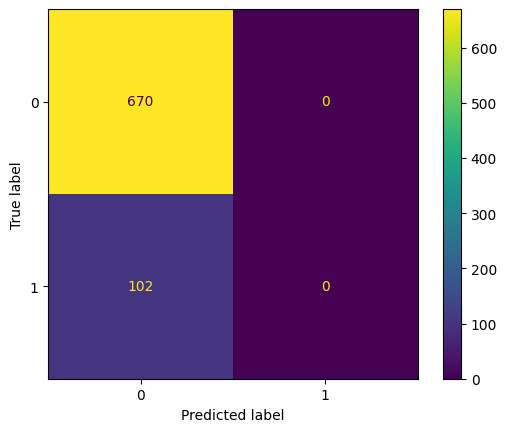

In [167]:
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

test_models(X_train, Y_train)  

In [168]:
#ADASYN HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled =  ADASYN(sampling_strategy='auto').fit_resample(X_train, Y_train)

# Define the hyperparameter grid for each classifier
param_grid_decision_tree = {'class_weight':['balanced', None], 
                            'max_depth': [None, 10, 20, 30, 40, 50, 100], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4], 
                            'criterion' :['gini', 'entropy', 'log_loss']}
param_grid_random_forest = {'class_weight':['balanced', 'balanced_subsample', None], 
                            'n_estimators': [5, 10, 100, 200], 
                            'max_depth': [None, 10, 30], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4],
                            'criterion' : ['gini', 'entropy', 'log_loss']}
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 
                  'activation': ['relu', 'tanh', 'logistic'], 
                  'max_iter': [200, 300, 400]}
param_grid_svm = {'C': [0.1, 1, 10, 20], 
                  'kernel': ['linear', 'rbf'], 
                  'gamma': ['scale', 'auto']}

# Create classifiers with balanced class weights
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
svm_classifier = svm.SVC()

# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')

In [169]:
# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_decision_tree.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)

Best hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'log_loss', 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [170]:
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_random_forest.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Random Forest:", grid_search_random_forest.best_params_)

Best hyperparameters for Random Forest: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [171]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_resampled, Y_resampled)
print("Best hyperparameters for K-Nearest Neighbours:", grid_search_knn.best_params_)

Best hyperparameters for K-Nearest Neighbours: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [172]:
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_mlp.fit(X_resampled, Y_resampled)
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

Best hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 400}


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [173]:
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_resampled, Y_resampled)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

Best hyperparameters for SVM: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


In [174]:
#ADASYN HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

X_resampled, Y_resampled =  ADASYN(sampling_strategy='auto').fit_resample(X_train, Y_train)

#Found in previous Grid search 
models = [DecisionTreeClassifier(class_weight=None, criterion='log_loss', max_depth=100, min_samples_leaf=1, min_samples_split=2), 
          RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
          KNeighborsClassifier(algorithm='auto',n_neighbors=3, weights='distance'), 
          MLPClassifier(max_iter=400, activation= 'relu', hidden_layer_sizes=(50,50)),
          svm.SVC(C=20, gamma='scale', kernel= 'rbf')]


In [175]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.8049820788530466
0.8813765147636115
0.8487898958866701
0.7897653183137056
0.7303780508619216
precision_macro
0.8108063575345332
0.8837239212968525
0.8678637834560189
0.7883399522024273
0.7492939758274632
recall_macro
0.8045833201257192
0.880276394514755
0.8478122330510223
0.7899790037908019
0.729198106706552
f1_macro
0.802807971409533
0.8823492093905599
0.8464257760625585
0.7868297254553218
0.7248217811470041
f1_micro
0.8059062980030722
0.8847047277692439
0.8487898958866701
0.7831088923024406
0.7303780508619218
f1_weighted
0.8073185423709441
0.8823676128987523
0.8465910537830942
0.7776011850189777
0.7251586959793422


DecisionTreeClassifier(criterion='log_loss', max_depth=100)
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       670
           1       0.32      0.40      0.36       102

    accuracy                           0.81       772
   macro avg       0.61      0.64      0.62       772
weighted avg       0.83      0.81      0.82       772

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=200)
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       670
           1       0.47      0.27      0.35       102

    accuracy                           0.86       772
   macro avg       0.68      0.61      0.63       772
weighted avg       0.84      0.86      0.85       772

KNeighborsClassifier(n_neighbors=3, weights='distance')
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       670
 

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       670
           1       0.00      0.00      0.00       102

    accuracy                           0.87       772
   macro avg       0.43      0.50      0.46       772
weighted avg       0.75      0.87      0.81       772



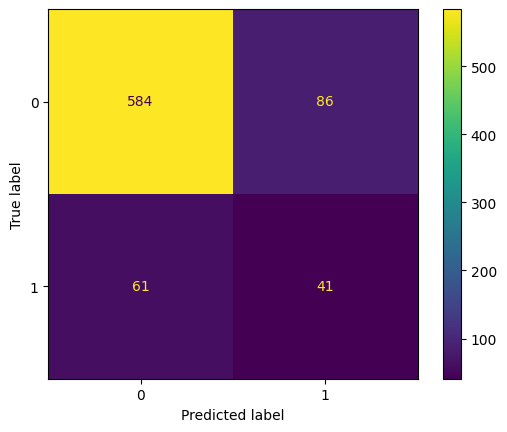

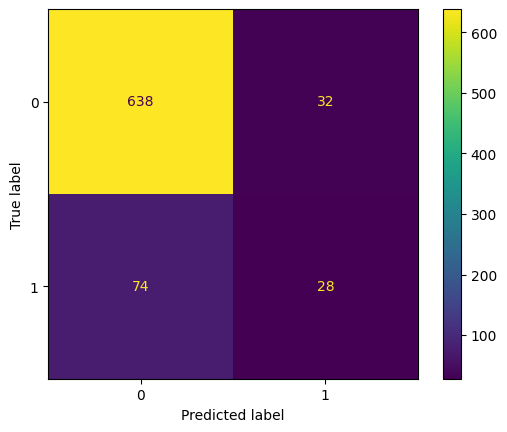

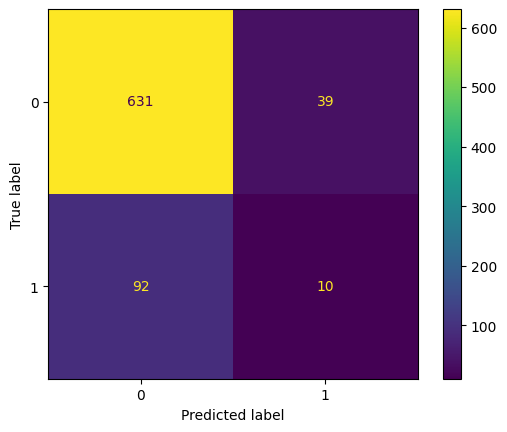

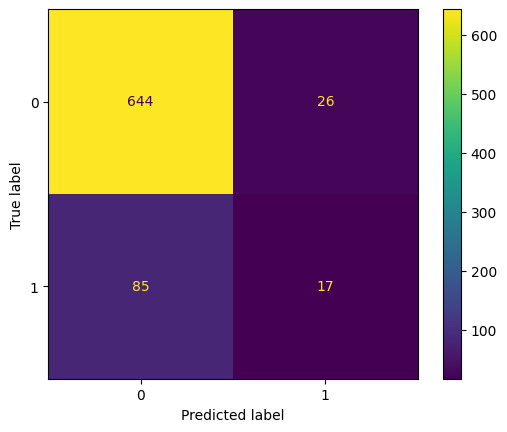

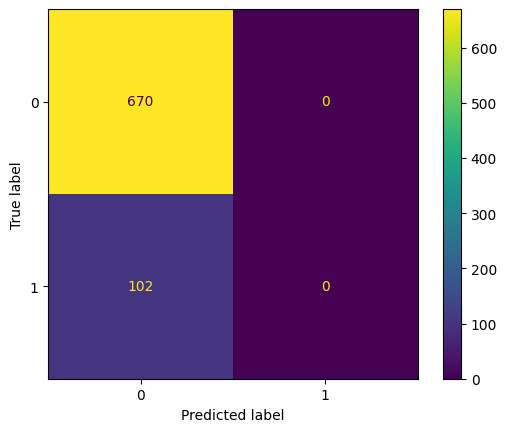

In [176]:
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

test_models(X_train, Y_train)  